In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [2]:
data=pd.read_csv(r"C:\Users\nagar\Desktop\feyn labs\project2\vacation_complete_dataset.csv")

In [3]:
data.head()

,Gender,Age,Education,Income,Income2,Occupation,State,Relationship.Status,Obligation,Obligation2,...,entertainment facilities,not care about prices,life style of the local people,intense experience of nature,cosiness/familiar atmosphere,maintain unspoilt surroundings,everything organised,unspoilt nature/natural landscape,cultural offers,change of surroundings
0,Female,25,6.0,"$30,001 to $60,000",30-60k,Clerical or service worker,VIC,single,4.800000,Q4,...,no,no,no,no,no,no,no,no,no,no
1,Female,31,8.0,"$120,001 to $150,000",>120k,professional,WA,married,3.300000,Q1,...,no,no,yes,no,no,no,no,no,no,yes
2,Male,21,3.0,"$90,001 to $120,000",90-120k,NaN,NSW,single,3.400000,Q2,...,no,yes,yes,no,yes,no,no,no,yes,no
3,Female,18,2.0,"$30,001 to $60,000",30-60k,unemployed,NSW,single,2.633333,Q1,...,yes,no,no,yes,no,no,no,no,no,yes
4,Male,61,3.0,"Less than $30,000",<30k,retired,WA,married,3.400000,Q2,...,no,no,yes,no,no,yes,no,no,no,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             1000 non-null   object 
 1   Age                                1000 non-null   int64  
 2   Education                          992 non-null    float64
 3   Income                             934 non-null    object 
 4   Income2                            934 non-null    object 
 5   Occupation                         941 non-null    object 
 6   State                              1000 non-null   object 
 7   Relationship.Status                996 non-null    object 
 8   Obligation                         1000 non-null   float64
 9   Obligation2                        1000 non-null   object 
 10  NEP                                1000 non-null   float64
 11  Vacation.Behaviour                 975 non-null    float6

In [5]:
data.columns

Index(['Gender', 'Age', 'Education', 'Income', 'Income2', 'Occupation',
       'State', 'Relationship.Status', 'Obligation', 'Obligation2', 'NEP',
       'Vacation.Behaviour', 'rest and relax', 'luxury / be spoilt',
       'do sports', 'excitement, a challenge', 'not exceed planned budget',
       'realise creativity', 'fun and entertainment', 'good company',
       'health and beauty', 'free-and-easy-going', 'entertainment facilities',
       'not care about prices', 'life style of the local people',
       'intense experience of nature', 'cosiness/familiar atmosphere',
       'maintain unspoilt surroundings', 'everything organised',
       'unspoilt nature/natural landscape', 'cultural offers',
       'change of surroundings'],
      dtype='object')

In [6]:
print(data.shape)

(1000, 32)


In [7]:
data.isnull().sum()

Gender                                0
Age                                   0
Education                             8
Income                               66
Income2                              66
Occupation                           59
State                                 0
Relationship.Status                   4
Obligation                            0
Obligation2                           0
NEP                                   0
Vacation.Behaviour                   25
rest and relax                        0
luxury / be spoilt                    0
do sports                             0
excitement, a challenge               0
not exceed planned budget             0
realise creativity                    0
fun and entertainment                 0
good company                          0
health and beauty                     0
free-and-easy-going                   0
entertainment facilities              0
not care about prices                 0
life style of the local people        0


In [8]:
data[['Gender','Age','Income','Income2']]

,Gender,Age,Income,Income2
0,Female,25,"$30,001 to $60,000",30-60k
1,Female,31,"$120,001 to $150,000",>120k
2,Male,21,"$90,001 to $120,000",90-120k
3,Female,18,"$30,001 to $60,000",30-60k
4,Male,61,"Less than $30,000",<30k
...,...,...,...,...
995,Male,51,"$30,001 to $60,000",30-60k
996,Male,58,"$60,001 to $90,000",60-90k
997,Male,41,"$60,001 to $90,000",60-90k
998,Female,42,NaN,NaN


In [9]:
data[['Gender','Age','Income','Income2']].describe()

,Age
count,1000.000000
mean,44.168000
std,14.539228
min,18.000000
25%,32.000000
50%,42.000000
75%,57.000000
max,105.000000


In [10]:
inc2 = data['Income2']

In [11]:
print(inc2.unique())

# Store the levels in a variable
lev = inc2.unique()

# Print the levels
print(lev)

['30-60k' '>120k' '90-120k' '<30k' '60-90k' nan]
['30-60k' '>120k' '90-120k' '<30k' '60-90k' nan]


In [12]:
new_levels = [lev[i] for i in [0, 2, 3, 4, 1]]

# Convert 'Income2' to an ordered categorical variable
inc2 = pd.Categorical(inc2, categories=new_levels, ordered=True)

In [13]:
inc2

['30-60k', '>120k', '90-120k', '30-60k', '<30k', ..., '30-60k', '60-90k', '60-90k', NaN, '>120k']
Length: 1000
Categories (5, object): ['30-60k' < '90-120k' < '<30k' < '60-90k' < '>120k']

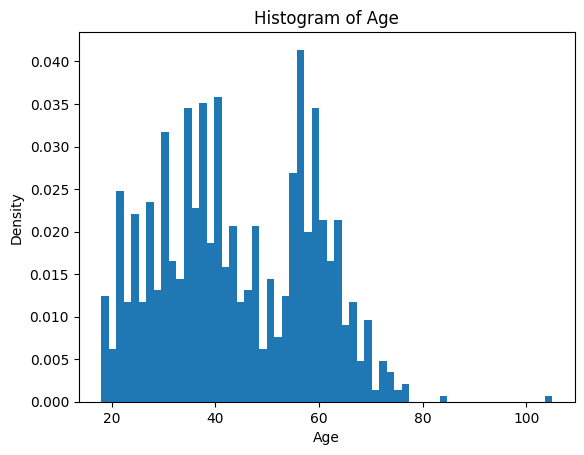

In [14]:
plt.figure()
plt.hist(data['Age'], bins=60, density=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Histogram of Age')
plt.show()

In [15]:
print(f"Summary of Age:\n{data['Age'].describe()}")

Summary of Age:
count    1000.000000
mean       44.168000
std        14.539228
min        18.000000
25%        32.000000
50%        42.000000
75%        57.000000
max       105.000000
Name: Age, dtype: float64


Text(0.5, 0, 'Age')

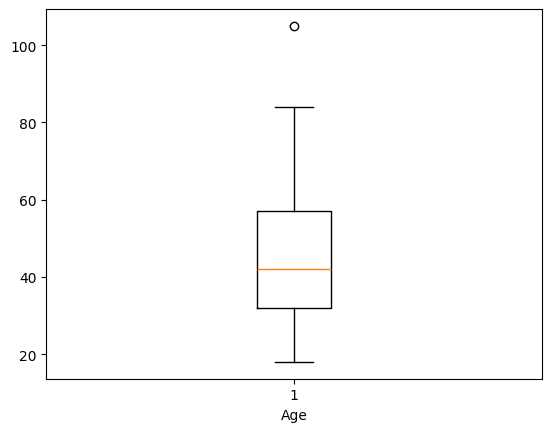

In [16]:
plt.figure()
plt.boxplot(data['Age'])
plt.xlabel('Age')

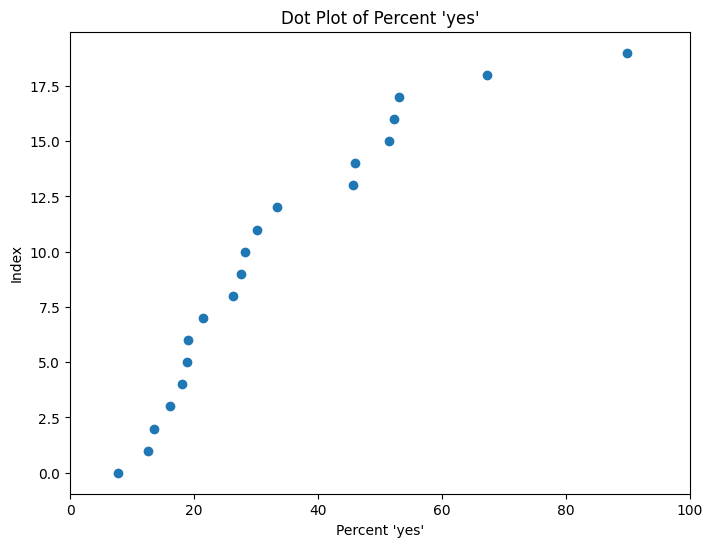

In [17]:


# Assuming 'data' is a pandas DataFrame with the relevant columns
yes = 100 * data.iloc[:, 12:32].eq('yes').mean(axis=0)

# Sorting yes percentages and their indices
sorted_yes = sorted(yes)
indices = range(len(sorted_yes))

plt.figure(figsize=(8, 6))
plt.scatter(sorted_yes, indices)
plt.xlabel('Percent \'yes\'')
plt.ylabel('Index')
plt.title('Dot Plot of Percent \'yes\'')
plt.xlim(0, 100)
plt.show()


In [18]:
print(sorted(data['Income'].value_counts()))

[10, 11, 15, 32, 72, 146, 150, 233, 265]


In [19]:
print(data['Income2'].value_counts())

Income2
30-60k     265
60-90k     233
<30k       150
90-120k    146
>120k      140
Name: count, dtype: int64


In [20]:
vacmot = (data.iloc[:, 12:31] == "yes").astype(int)

In [21]:
vacmot

,rest and relax,luxury / be spoilt,do sports,"excitement, a challenge",not exceed planned budget,realise creativity,fun and entertainment,good company,health and beauty,free-and-easy-going,entertainment facilities,not care about prices,life style of the local people,intense experience of nature,cosiness/familiar atmosphere,maintain unspoilt surroundings,everything organised,unspoilt nature/natural landscape,cultural offers
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1
3,1,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,0,1
996,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,1,1
997,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0
998,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
vacmot_scaled = scale(vacmot)

In [23]:
vacmot_pca = PCA()
vacmot_pca.fit(vacmot_scaled)

PCA()

In [24]:
print(vacmot_pca)

PCA()
